In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置字体大小
plt.rcParams['font.size'] = 20
# 加粗图片边框
plt.rcParams['axes.linewidth'] = 2
# legend尺寸
plt.rcParams['legend.fontsize'] = 15

In [45]:
data_path = r'..\Question\Wimbledon_featured_matches.csv'
data = pd.read_csv(data_path)
print(data.head())
grouped = data.groupby('match_id')

              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run  \
0        

In [46]:
def analyse_match(match):
    match_id = match['match_id']
    player1 = match['player1']
    player2 = match['player2']
    # point_victor,winner of the point,"1 if player 1 wins, 2 if player 2 wins"
    # 统计单盘比赛中每个球员的得分情况
    set_grouped = match.groupby('set_no')
    res_dict = {
        'player_score': 0,
        'player_score_serve': 0,
        'player_score_return': 0,
        'player_score_after_equ_point': 0,
        'player_score_after_win_point': 0,
        'player_score_after_lost_point': 0,
        'player_score_after_equ_game': 0,
        'player_score_after_win_game': 0,
        'player_score_after_lost_game': 0,
        'player_score_after_equ_set': 0,
        'player_score_after_win_set': 0,
        'player_score_after_lost_set': 0,

        'player_score_after_equ_point_with_server': 0,
        'player_score_after_win_point_with_server': 0,
        'player_score_after_lost_point_with_server': 0,
        'player_score_after_equ_game_with_server': 0,
        'player_score_after_win_game_with_server': 0,
        'player_score_after_lost_game_with_server': 0,
        'player_score_after_equ_set_with_server': 0,
        'player_score_after_win_set_with_server': 0,
        'player_score_after_lost_set_with_server': 0,

        'player_score_after_equ_point_with_return': 0,
        'player_score_after_win_point_with_return': 0,
        'player_score_after_lost_point_with_return': 0,
        'player_score_after_equ_game_with_return': 0,
        'player_score_after_win_game_with_return': 0,
        'player_score_after_lost_game_with_return': 0,
        'player_score_after_equ_set_with_return': 0,
        'player_score_after_win_set_with_return': 0,
        'player_score_after_lost_set_with_return': 0
    }
    for set_no, set_data in set_grouped:
        game_grouped = set_data.groupby('game_no')
        player1_win_set = set_data['p1_sets'].values[0]
        player2_win_set = set_data['p2_sets'].values[0]
        set_flag = 1 if player1_win_set > player2_win_set else (2 if player1_win_set < player2_win_set else 0)
        for game_no, game_data in game_grouped:
            server = game_data['server'].values[0]
            player1_win_game = game_data['p1_games'].values[0]
            player2_win_game = game_data['p2_games'].values[0]
            game_flag = 1 if player1_win_game > player2_win_game else (2 if player1_win_game < player2_win_game else 0)
            
            player1_score = 0
            player2_score = 0
            point_flag = 0
            for point_no, point_data in game_data.iterrows():
                point_victor = point_data['point_victor']

                
                res_dict['player_score'] += 1

                if point_victor == 1:
                    res_dict['player_score_serve'] += 1 if server == 1 else 0
                    res_dict['player_score_return'] += 1 if server == 2 else 0

                    res_dict['player_score_after_equ_point'] += 1 if point_flag == 0 else 0
                    res_dict['player_score_after_win_point'] += 1 if point_flag == 1 else 0
                    res_dict['player_score_after_lost_point'] += 1 if point_flag == 2 else 0
                    res_dict['player_score_after_equ_game'] += 1 if game_flag == 0 else 0
                    res_dict['player_score_after_win_game'] += 1 if game_flag == 1 else 0
                    res_dict['player_score_after_lost_game'] += 1 if game_flag == 2 else 0
                    res_dict['player_score_after_equ_set'] += 1 if set_flag == 0 else 0
                    res_dict['player_score_after_win_set'] += 1 if set_flag == 1 else 0
                    res_dict['player_score_after_lost_set'] += 1 if set_flag == 2 else 0

                    res_dict['player_score_after_equ_point_with_server'] += 1 if point_flag == 0 and server == 1 else 0
                    res_dict['player_score_after_win_point_with_server'] += 1 if point_flag == 1 and server == 1 else 0
                    res_dict['player_score_after_lost_point_with_server'] += 1 if point_flag == 2 and server == 1 else 0
                    res_dict['player_score_after_equ_game_with_server'] += 1 if game_flag == 0 and server == 1 else 0
                    res_dict['player_score_after_win_game_with_server'] += 1 if game_flag == 1 and server == 1 else 0
                    res_dict['player_score_after_lost_game_with_server'] += 1 if game_flag == 2 and server == 1 else 0  
                    res_dict['player_score_after_equ_set_with_server'] += 1 if set_flag == 0 and server == 1 else 0
                    res_dict['player_score_after_win_set_with_server'] += 1 if set_flag == 1 and server == 1 else 0
                    res_dict['player_score_after_lost_set_with_server'] += 1 if set_flag == 2 and server == 1 else 0

                    res_dict['player_score_after_equ_point_with_return'] += 1 if point_flag == 0 and server == 2 else 0
                    res_dict['player_score_after_win_point_with_return'] += 1 if point_flag == 1 and server == 2 else 0
                    res_dict['player_score_after_lost_point_with_return'] += 1 if point_flag == 2 and server == 2 else 0
                    res_dict['player_score_after_equ_game_with_return'] += 1 if game_flag == 0 and server == 2 else 0
                    res_dict['player_score_after_win_game_with_return'] += 1 if game_flag == 1 and server == 2 else 0
                    res_dict['player_score_after_lost_game_with_return'] += 1 if game_flag == 2 and server == 2 else 0
                    res_dict['player_score_after_equ_set_with_return'] += 1 if set_flag == 0 and server == 2 else 0
                    res_dict['player_score_after_win_set_with_return'] += 1 if set_flag == 1 and server == 2 else 0
                    res_dict['player_score_after_lost_set_with_return'] += 1 if set_flag == 2 and server == 2 else 0

                elif point_victor == 2:
                    res_dict['player_score_serve'] += 1 if server == 2 else 0
                    res_dict['player_score_return'] += 1 if server == 1 else 0

                    res_dict['player_score_after_equ_point'] += 1 if point_flag == 0 else 0
                    res_dict['player_score_after_win_point'] += 1 if point_flag == 2 else 0
                    res_dict['player_score_after_lost_point'] += 1 if point_flag == 1 else 0
                    res_dict['player_score_after_equ_game'] += 1 if game_flag == 0 else 0
                    res_dict['player_score_after_win_game'] += 1 if game_flag == 2 else 0
                    res_dict['player_score_after_lost_game'] += 1 if game_flag == 1 else 0
                    res_dict['player_score_after_equ_set'] += 1 if set_flag == 0 else 0
                    res_dict['player_score_after_win_set'] += 1 if set_flag == 2 else 0
                    res_dict['player_score_after_lost_set'] += 1 if set_flag == 1 else 0

                    res_dict['player_score_after_equ_point_with_server'] += 1 if point_flag == 0 and server == 2 else 0
                    res_dict['player_score_after_win_point_with_server'] += 1 if point_flag == 2 and server == 2 else 0
                    res_dict['player_score_after_lost_point_with_server'] += 1 if point_flag == 1 and server == 2 else 0
                    res_dict['player_score_after_equ_game_with_server'] += 1 if game_flag == 0 and server == 2 else 0
                    res_dict['player_score_after_win_game_with_server'] += 1 if game_flag == 2 and server == 2 else 0
                    res_dict['player_score_after_lost_game_with_server'] += 1 if game_flag == 1 and server == 2 else 0
                    res_dict['player_score_after_equ_set_with_server'] += 1 if set_flag == 0 and server == 2 else 0
                    res_dict['player_score_after_win_set_with_server'] += 1 if set_flag == 2 and server == 2 else 0
                    res_dict['player_score_after_lost_set_with_server'] += 1 if set_flag == 1 and server == 2 else 0

                    res_dict['player_score_after_equ_point_with_return'] += 1 if point_flag == 0 and server == 1 else 0
                    res_dict['player_score_after_win_point_with_return'] += 1 if point_flag == 2 and server == 1 else 0
                    res_dict['player_score_after_lost_point_with_return'] += 1 if point_flag == 1 and server == 1 else 0
                    res_dict['player_score_after_equ_game_with_return'] += 1 if game_flag == 0 and server == 1 else 0
                    res_dict['player_score_after_win_game_with_return'] += 1 if game_flag == 2 and server == 1 else 0
                    res_dict['player_score_after_lost_game_with_return'] += 1 if game_flag == 1 and server == 1 else 0
                    res_dict['player_score_after_equ_set_with_return'] += 1 if set_flag == 0 and server == 1 else 0
                    res_dict['player_score_after_win_set_with_return'] += 1 if set_flag == 2 and server == 1 else 0
                    res_dict['player_score_after_lost_set_with_return'] += 1 if set_flag == 1 and server == 1 else 0
                    
                player1_score += 1 if point_victor == 1 else 0
                player2_score += 1 if point_victor == 2 else 0
                point_flag = 1 if player1_score > player2_score else (2 if player1_score < player2_score else 0)

    # print(res_dict)
    return res_dict

[3.9705749576860483, 0.3663530395577218, 2.439287023460411, 0.016564065590741903, 0.1594326296800979, 0.5826754856791062, 0.0, 0.0, 0.08446187463749547, 2.2066526934073503, 2.9166008431866643, 0.003944843548803868, 0.014389163449597567, 0.2560522641658544, 1.2139855762649996, 0.6356524122807012, 0.01436093948133449, 0.0, 0.0, 2.7223892985398246, 0.0, 1.16269099295014, 0.3581054240203807, 0.0, 0.0, 0.0, 2.9952703464644297, 0.25078938331405454, 0.5035572293219318, 0.389397057581898, 3.2729999589668455]
{'player_score_after_lost_point_with_server': 903, 'player_score_after_win_point_with_server': 2247, 'player_score_after_lost_point_with_return': 1091, 'player_score_after_win_point_with_return': 493}
2.9432265365388894


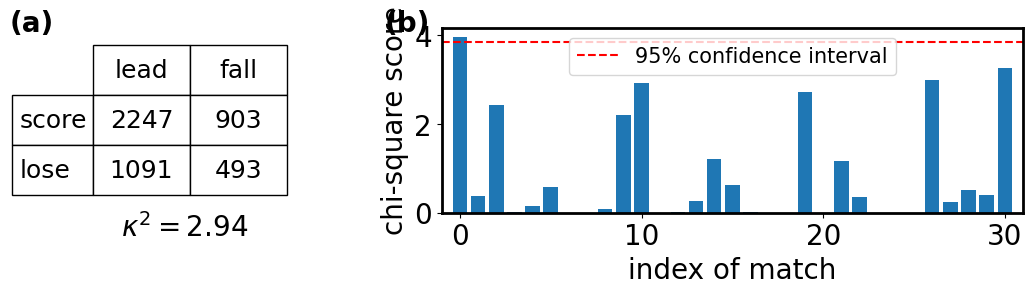

In [47]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_point_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_point_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_point_with_server']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_point_with_return']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_point_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_lose_with_serve
    b = player_win_after_win_with_serve
    c = player_loss_after_loss_with_serve
    d = player_loss_after_win_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_point_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_point_with_server': 0, 'player_score_after_win_point_with_server': 0, 'player_score_after_lost_point_with_return': 0, 'player_score_after_win_point_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_point_with_server(match_all)
print(chi_square_score_all)


# 可视化
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 2.4), width_ratios=[1, 3])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.4)

# 堆叠连列表，显示每局比赛中分数领先的分布情况
ax = axes[0]
col_label = ['lead', 'fall']
row_label = ['score', 'lose']
values = [[match_all['player_score_after_win_point_with_server'], match_all['player_score_after_lost_point_with_server']],
            [match_all['player_score_after_lost_point_with_return'], match_all['player_score_after_win_point_with_return']]]
# 增大行宽度
table = ax.table(cellText=values, rowLabels=row_label, colLabels=col_label, loc='center', cellLoc='center')
table.scale(1, 3)
table.set_fontsize(fondsize-2)
ax.axis('off')
# 图标下加文字 $kappa = $, 保留两位小数
ax.text(0.8, 0, f'$\kappa^2 = {chi_square_score_all:.2f}$', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

# 图左上标号（a）
ax.text(-0.2, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_xlim(-1, len(chi_square_score_list))

ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval')
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval', linewidth=2)
ax.legend()
# 图左上标号（b）
ax.text(-0.02, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\points_lead_kappa.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()


[0.0017563637375430088, 0.004576421030734819, 1.2681488203266786, 0.008923472065704445, 0.4356054057972988, 0.07066016328561942, 2.5422797354968365, 0.0, 1.1236964994824752, 0.0, 0.0, 0.3824148080440817, 0.08530456183556104, 0.3010358732865126, 0.0, 1.7205308307533533, 0.12568134222217914, 1.0086702274779864, 1.4951251805488681, 0.0, 0.17578007584495509, 5.574496547998849, 0.24440507188950536, 1.3107628004179728, 7.2873013608998365e-06, 0.9414139146593383, 3.821083791121243, 0.10275136076141833, 0.9290608974358974, 1.7893459953646953e-05, 4.357668450768012]
{'player_score_after_lost_game_with_server': 2028, 'player_score_after_win_game_with_server': 1033, 'player_score_after_lost_game_with_return': 481, 'player_score_after_win_game_with_return': 1052}
2.4921338046726205


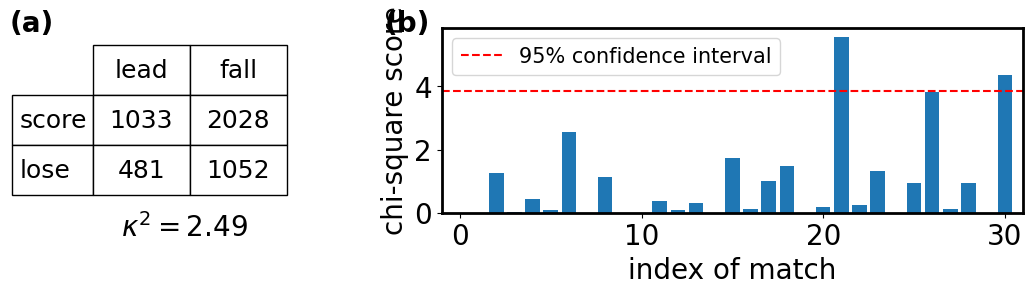

In [48]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_game_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_game_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_game_with_server']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_game_with_return']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_game_with_return']

    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_lose_with_serve
    b = player_win_after_win_with_serve
    c = player_loss_after_loss_with_serve
    d = player_loss_after_win_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_game_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_game_with_server': 0, 'player_score_after_win_game_with_server': 0, 'player_score_after_lost_game_with_return': 0, 'player_score_after_win_game_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_game_with_server(match_all)
print(chi_square_score_all)


# 可视化
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 2.4), width_ratios=[1, 3])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.4)

# 堆叠连列表，显示每局比赛中分数领先的分布情况
ax = axes[0]
col_label = ['lead', 'fall']
row_label = ['score', 'lose']
values = [[match_all['player_score_after_win_game_with_server'], match_all['player_score_after_lost_game_with_server']],
            [match_all['player_score_after_lost_game_with_return'], match_all['player_score_after_win_game_with_return']]]

# 增大行宽度
table = ax.table(cellText=values, rowLabels=row_label, colLabels=col_label, loc='center', cellLoc='center')
table.scale(1, 3)
table.set_fontsize(fondsize-2)
ax.axis('off')
# 图标下加文字 $kappa = $, 保留两位小数
ax.text(0.8, 0, f'$\kappa^2 = {chi_square_score_all:.2f}$', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

# 图左上标号（a）
ax.text(-0.2, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_xlim(-1, len(chi_square_score_list))

ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval')
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval', linewidth=2)
ax.legend()
# 图左上标号（b）
ax.text(-0.02, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\points_lead_kappa.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()


[0.08993925624548474, 0.40234258984258997, 6.0057332041343665, 1.183296335330854, 0.021873571417311576, 0.05931786218420522, 2.5377513258592925, 0.5778418045705276, 0.0, 1.1066066901592888, 5.867456896551724, 0.0, 0.21402438283234632, 8.889163043150045, 0.8470820576498788, 2.4274553571428585, 0.0, 0.010397471334971375, 5.694533248081841, 0.028068511458015352, 7.818464554789774, 0.0782317174745959, 0.0, 0.4253938356164382, 2.0067313347030327, 3.017202702033682, 0.017027058279370774, 0.0, 1.3743815570644355, 0.20576768719183608, 1.113576675516848]
{'player_score_after_lost_set_with_server': 1371, 'player_score_after_win_set_with_server': 1337, 'player_score_after_lost_set_with_return': 576, 'player_score_after_win_set_with_return': 727}
9.20700845702817


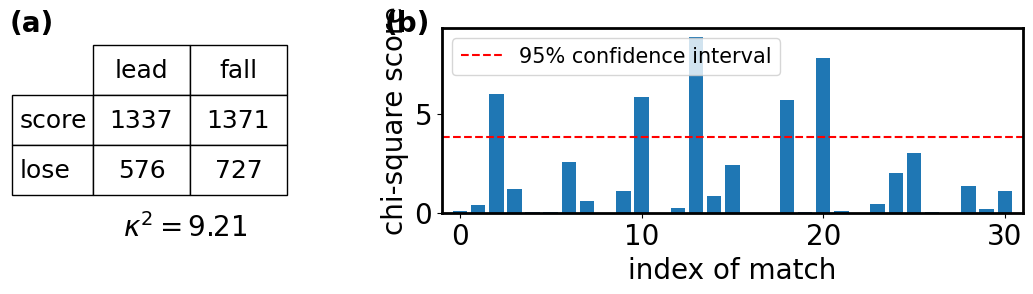

In [49]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_set_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_set_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_set_with_server']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_set_with_return']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_set_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_lose_with_serve
    b = player_win_after_win_with_serve
    c = player_loss_after_loss_with_serve
    d = player_loss_after_win_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_set_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_set_with_server': 0, 'player_score_after_win_set_with_server': 0, 'player_score_after_lost_set_with_return': 0, 'player_score_after_win_set_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_set_with_server(match_all)
print(chi_square_score_all)

# 可视化
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 2.4), width_ratios=[1, 3])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.4)

# 堆叠连列表，显示每局比赛中分数领先的分布情况
ax = axes[0]
col_label = ['lead', 'fall']
row_label = ['score', 'lose']
values = [[match_all['player_score_after_win_set_with_server'], match_all['player_score_after_lost_set_with_server']],
            [match_all['player_score_after_lost_set_with_return'], match_all['player_score_after_win_set_with_return']]]

# 增大行宽度
table = ax.table(cellText=values, rowLabels=row_label, colLabels=col_label, loc='center', cellLoc='center')
table.scale(1, 3)
table.set_fontsize(fondsize-2)
ax.axis('off')
# 图标下加文字 $kappa = $, 保留两位小数
ax.text(0.8, 0, f'$\kappa^2 = {chi_square_score_all:.2f}$', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

# 图左上标号（a）
ax.text(-0.2, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_xlim(-1, len(chi_square_score_list))

ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval')
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval', linewidth=2)
ax.legend()
# 图左上标号（b）
ax.text(-0.02, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\points_lead_kappa.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()